In [1]:
# Import dependencies and libaries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import postgresql keys with username & password on local host (5432)
from postgresql_keys import user_name, pwd
# Create a connection string progresql link for sqlalchemy 
progresql_link = "postgresql://" + user_name + ":" + pwd + "@localhost:5432/Employees_db"

from sqlalchemy import create_engine
# Establish the postgresql database connection
engine = create_engine(progresql_link)
conn = engine.connect()

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Execute the query for all records in salaries table & show first few rows
salaries = pd.read_sql("SELECT * FROM salaries", conn)
salaries.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


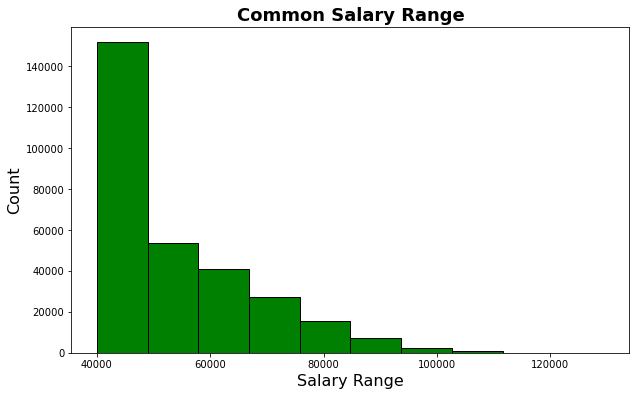

In [3]:
# Generate histogram to visualize the most common salary ranges for employees.

# Set figsize
plt.figure(figsize=(10,6))

# Plot histogram
plt.hist(salaries["salary"], color="green",edgecolor='black')

# Label chart axises and title
plt.title("Common Salary Range", fontweight="bold", fontsize=18)
plt.xlabel("Salary Range", fontsize=16)
plt.ylabel("Count", fontsize=16)

# Show graph
plt.show()

In [4]:
# Execute the query for all records in the titles table & show first few rows
titles = pd.read_sql("SELECT * FROM titles", conn)
titles.head()

,title_id,title
0,s0001,Staff
1,s0002,Senior Staff
2,e0001,Assistant Engineer
3,e0002,Engineer
4,e0003,Senior Engineer


In [13]:
# Execute the query for all records in the employees table & show first few rows
employees = pd.read_sql("SELECT * FROM employees", conn)
employees.head()

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28
1,475053,e0002,1954-11-18,Byong,Delgrande,F,1991-09-07
2,57444,e0002,1958-01-30,Berry,Babb,F,1992-03-21
3,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26
4,282238,e0003,1952-10-28,Abdelkader,Baumann,F,1991-01-18


In [ ]:
# There are two methods of getting the average salary by employee title and plotting graph.

In [6]:
# Method 1: Create a bar chart of average salary by title by using pandas to manipulate data
employees = employees.rename(columns={"emp_title_id":"title_id"})

# Merge the employees and the titles tables, & show some rows
merge_df = []
merge_df = pd.merge(employees, titles, on= "title_id", how = "inner")
merge_df

,emp_no,title_id,birth_date,first_name,last_name,sex,hire_date,title
0,473302,s0001,1953-07-25,Hideyuki,Zallocco,M,1990-04-28,Staff
1,421786,s0001,1957-09-28,Xiong,Verhoeff,M,1987-11-26,Staff
2,273487,s0001,1957-04-14,Christoph,Parfitt,M,1991-06-28,Staff
3,246449,s0001,1958-03-23,Subbu,Bultermann,F,1988-03-25,Staff
4,48085,s0001,1964-01-19,Venkatesan,Gilg,M,1993-06-28,Staff
...,...,...,...,...,...,...,...,...
300019,111400,m0001,1959-11-09,Arie,Staelin,M,1985-01-01,Manager
300020,111133,m0001,1955-03-16,Hauke,Zhang,M,1986-12-30,Manager
300021,110085,m0001,1959-10-28,Ebru,Alpin,M,1985-01-01,Manager
300022,110386,m0001,1953-10-04,Shem,Kieras,M,1988-10-14,Manager


In [7]:
# Method 1 (cont.): appending more data to it by merging with the salaries table and calculate the mean of salaries
merge_df = pd.merge(merge_df, salaries, on= "emp_no", how = "inner")

# Calculate the mean of salary from the merged table
pandas_merge_df = []
pandas_merge_df = merge_df.groupby(["title"])["salary"].mean().reset_index()
pandas_merge_df = pandas_merge_df.rename(columns={"salary":"average salary"})

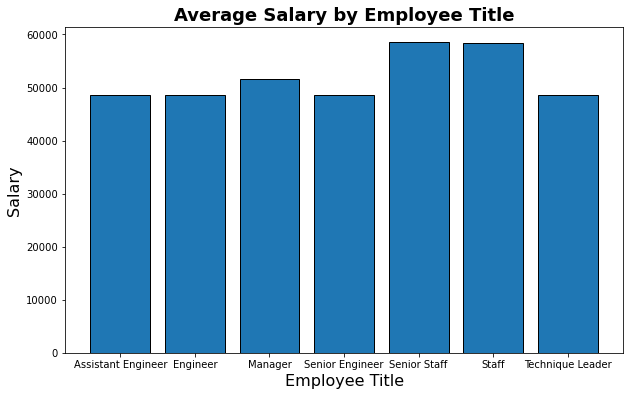

In [8]:
# Method 1 (cont.): create a bar chart of the average salary by title from the merged pandas data frames
x_axis = pandas_merge_df["title"]
ticks = np.arange(len(x_axis))
y_axis = pandas_merge_df["average salary"]

# Set figsize
plt.figure(figsize=(10,6))

# Plot bar chart
plt.bar(x_axis, y_axis, align="center", edgecolor='black')

# Label chart axises and title
plt.title("Average Salary by Employee Title", fontweight="bold", fontsize=18)
plt.xlabel("Employee Title", fontsize=16)
plt.ylabel("Salary", fontsize=16)

# Show graph
plt.show()

In [9]:
# Method 2.a: Create a bar chart of average salary by title by making direct call to postsql db view
# Execute the agrregated query in all_employees_details view (created in pgAdmin) group by title 
# (with postgresql aggregate function) to calculate the average salary
all_emp = []
all_emp = pd.read_sql("SELECT title, AVG(salary) FROM all_employees_details GROUP BY title", conn)
all_emp

,title,avg
0,Assistant Engineer,48615.074794
1,Engineer,48533.339845
2,Manager,51531.041667
3,Senior Engineer,48505.714313
4,Senior Staff,58557.394072
5,Staff,58460.049489
6,Technique Leader,48574.320997


In [14]:
# Method 2.b: run a complicated query and joinning tables via postgresql server connection and then
# calculate the average salary by using pandas groupby and mean.
test_query = pd.read_sql("""
select employees.*, employment_details.dept_name, employee_info.salary, titles.title
from employees 
inner join titles
on employees.emp_title_id = titles.title_id
inner join employment_details
on employees.emp_no = employment_details.emp_no
inner join employee_info
on employees.emp_no = employee_info.emp_no;""",conn)
test_query.head()

# Calculate the average/mean
average = test_query.groupby(["title"])["salary"].mean().reset_index()
average

,title,salary
0,Assistant Engineer,48615.074794
1,Engineer,48533.339845
2,Manager,51531.041667
3,Senior Engineer,48505.714313
4,Senior Staff,58557.394072
5,Staff,58460.049489
6,Technique Leader,48574.320997


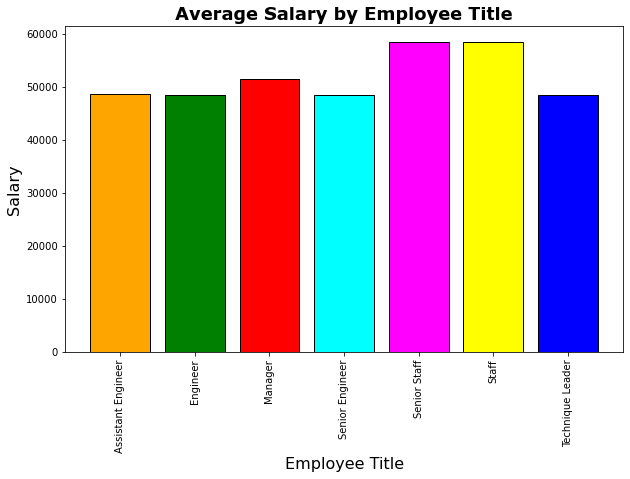

In [15]:
# Method 2: Plot bar chart of average salary by employee title 
x_axis = all_emp["title"]
ticks = np.arange(len(x_axis))
y_axis = all_emp["avg"]

# Set figsize
plt.figure(figsize=(10,6))

# Plot bar chart
plt.bar(x_axis, y_axis, align="center", color=["orange","green","red","cyan","magenta","yellow","blue"],edgecolor='black')

# Label chart axises and title
plt.title("Average Salary by Employee Title", fontweight="bold", fontsize=18, font="Verdana")
plt.xticks(ticks, x_axis, rotation="vertical")
plt.xlabel("Employee Title", fontsize=16)
plt.ylabel("Salary", fontsize=16)

# Show graph
plt.show()


In [16]:
# Epilogue: find all the relevant details of the employee id 499942 by query directly to the postsql database
employee_499942 = pd.read_sql("""
select employees.*, employment_details.dept_name, employee_info.salary, titles.title
    from employees 
    inner join titles
    on employees.emp_title_id = titles.title_id
    inner join employment_details
    on employees.emp_no = employment_details.emp_no
    inner join employee_info
    on employees.emp_no = employee_info.emp_no
    where employees.emp_no = 499942""", conn)
employee_499942

,emp_no,emp_title_id,birth_date,first_name,last_name,sex,hire_date,dept_name,salary,title
0,499942,e0004,1963-01-10,April,Foolsday,F,1997-02-10,Development,40000,Technique Leader


In [ ]:
# Close postgresql database connection after the work is finished
conn.close()